# Plot Mee Mass:

In [3]:
from Gaugi import load
from Gaugi.monet.utils import getColor,getColors
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from ROOT import TCanvas, TH1F, TH1I, TFile
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from pprint import pprint
import array
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()
GeV=1000.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Applying ATLAS style settings...


In [5]:
path = '/Volumes/castor/cern_data/data17_13TeV/Mon/Egam1/after_ts1/'
path+= 'user.jodafons.data17_13TeV.00331129.physics_Main.deriv.DAOD_EGAM1.f848_m1844_p3336.r0002_GLOBAL/'
path+= 'user.jodafons.16343872.GLOBAL._000006.root'
file = TFile(path, 'read')

In [13]:
runname = file.GetListOfKeys()[0].GetName()
mee = file.Get('/'+runname+'/HLT/Egamma/Expert/Event/Zee_Mee')

In [20]:
def NormHist(hist, norm=None, removeZeros=0):
    from ROOT import TH1F
    if not norm:  norm = 1./sum(hist)
    h = TH1F(hist.GetName()+"_normalized", hist.GetTitle(), hist.GetNbinsX(), hist.GetBinLowEdge(1),
           hist.GetBinLowEdge( hist.GetNbinsX() + 1 ) )
    for bin in range(0,h.GetNbinsX()+1):
        content = hist.GetBinContent(bin)
        if not content and removeZeros:  content=removeZeros
        value = content*norm if norm else content
        h.SetBinContent(bin , value )
    return h

In [21]:
def AddLegend(canvas, x, y, legends):
    MakeLegend( canvas,x,y,x+0.98,y+0.35,textsize=16, names=legends, option = 'p' )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file data17_Zee_mass.pdf has been created


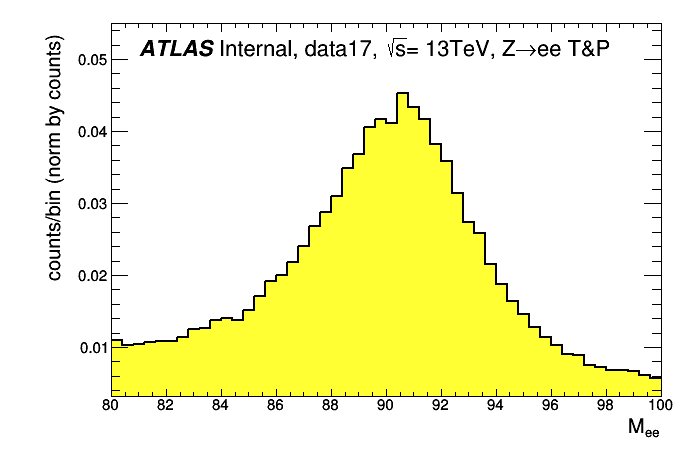

In [33]:
def PlotHist( h, xlabel, normalize=False,y_axis_maximum=None ):
    
    canvas = TCanvas('canvas','canvas',700, 500)
    if normalize:
        h = NormHist(h)
    h.SetLineColor(kBlack)
    h.SetFillColor(kYellow-4)
    if y_axis_maximum:
        h.SetMaximum(y_axis_maximum)  
    AddHistogram(canvas,h, 'same')
    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)
    SetAxisLabels(canvas,xlabel, 'counts/bin (norm by counts)')
    return canvas

canvas = PlotHist(mee,'M_{ee}', normalize=True,y_axis_maximum=0.055)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, data17, #sqrt{s}= 13TeV, Z#rightarrowee T&P')
#AddLegend( canvas,0.6,0.55, ['Mee'])
canvas.Draw()
canvas.SaveAs('data17_Zee_mass.pdf')